In [67]:
import pandas as pd
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import pandas
import shap

In [68]:
# Load the model
model = joblib.load('../Models/healthinsurance_XGB_LE.pkl')

In [69]:
# Load the label encoder (adjust path if needed)
with open("../Models/encoder_dict.pkl", "rb") as f:
    le = pickle.load(f)

print("Label encoder loaded successfully!")

Label encoder loaded successfully!


In [70]:
import pandas as pd
data = pd.read_csv("../DataSet/healthinsurance.csv")

data_LE = pd.read_csv("../DataSet/RegressionData/healthinsurance_LE.csv")


import pandas as pd
data = pd.read_csv("../DataSet/healthinsurance.csv")

data_LE = pd.read_csv("../DataSet/RegressionData/healthinsurance_LE.csv")

In [71]:
X = data_LE.drop("claim", axis=1)
y = data_LE["claim"]

X.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
0,60,1,64,24,8,1,0,55,72,0,0,2
1,49,0,75,22,8,1,0,5,78,1,1,16
2,32,0,64,17,4,2,1,63,88,1,1,0
3,61,0,53,36,8,1,1,64,72,1,0,10
4,19,0,50,20,8,0,0,8,82,1,0,22


C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


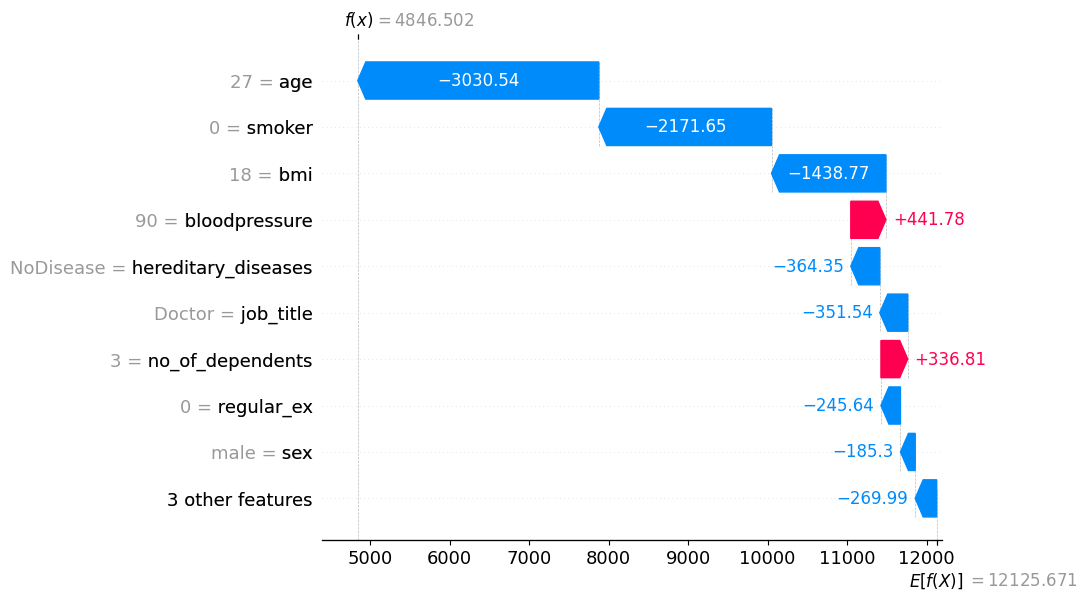

C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


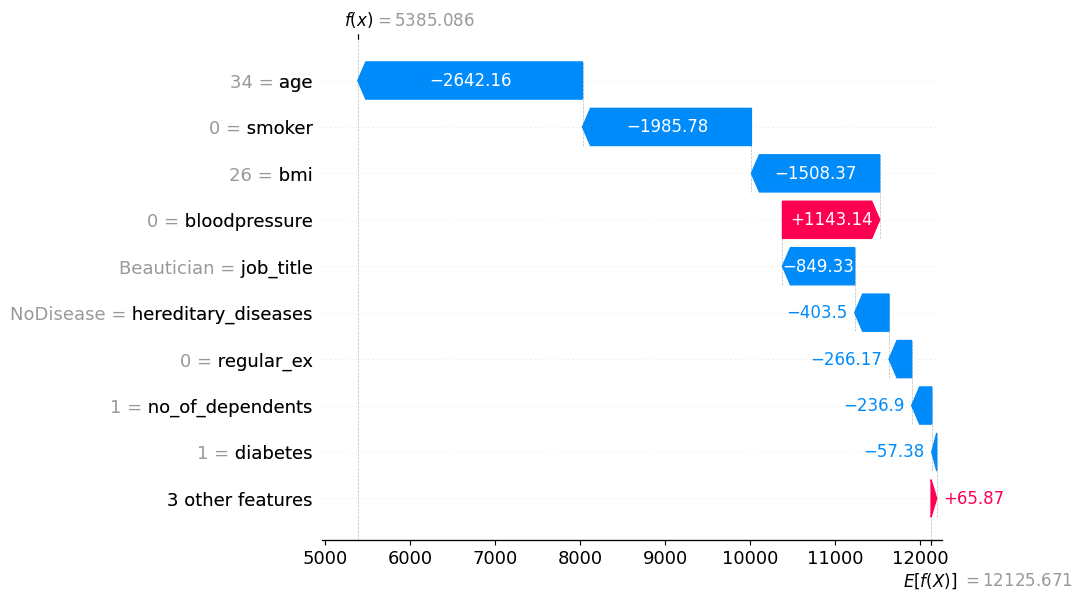

C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


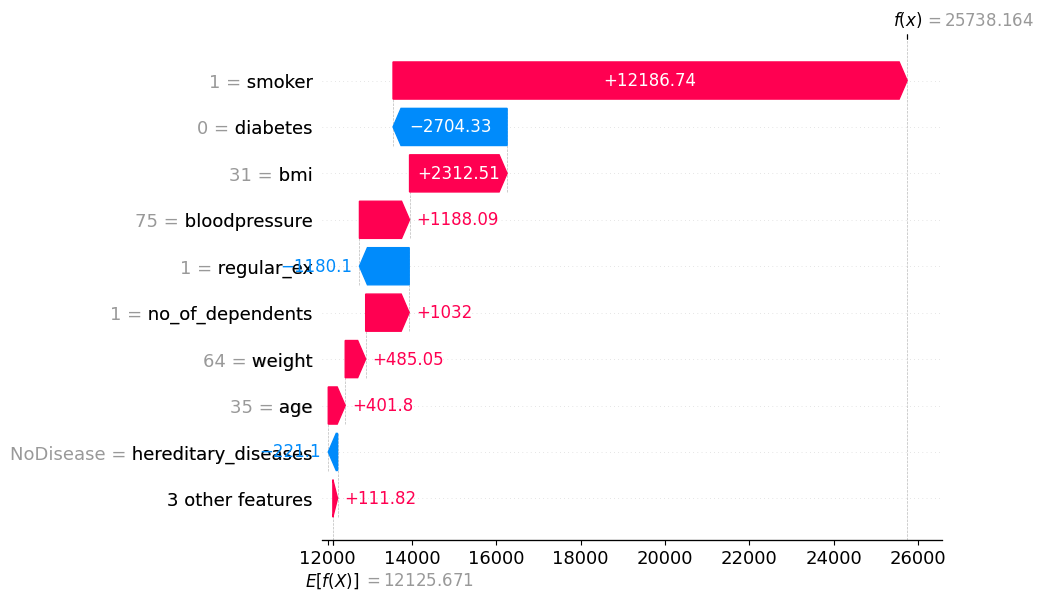

C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


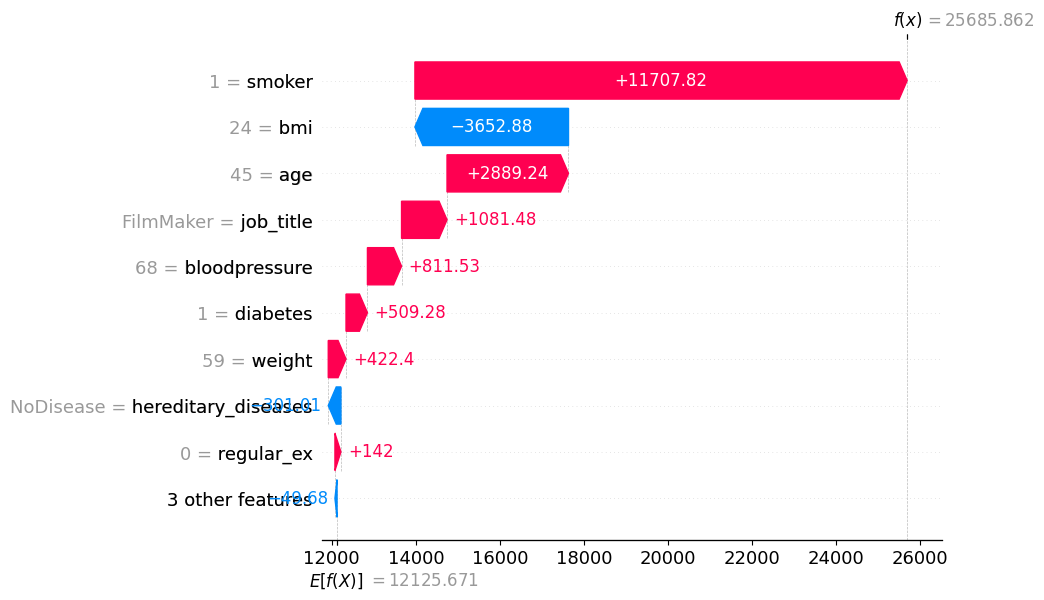

C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


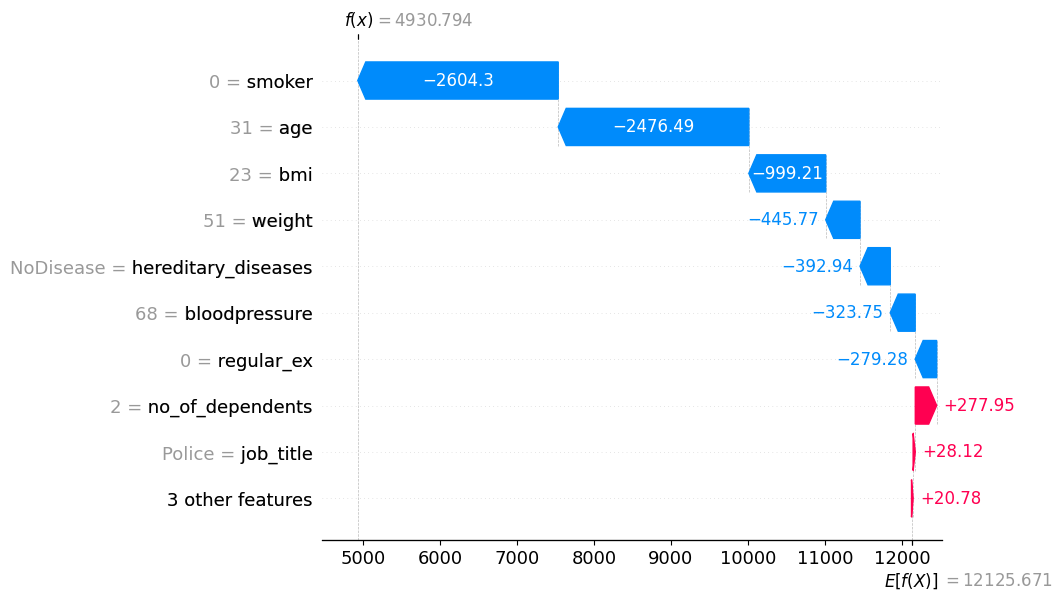

C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


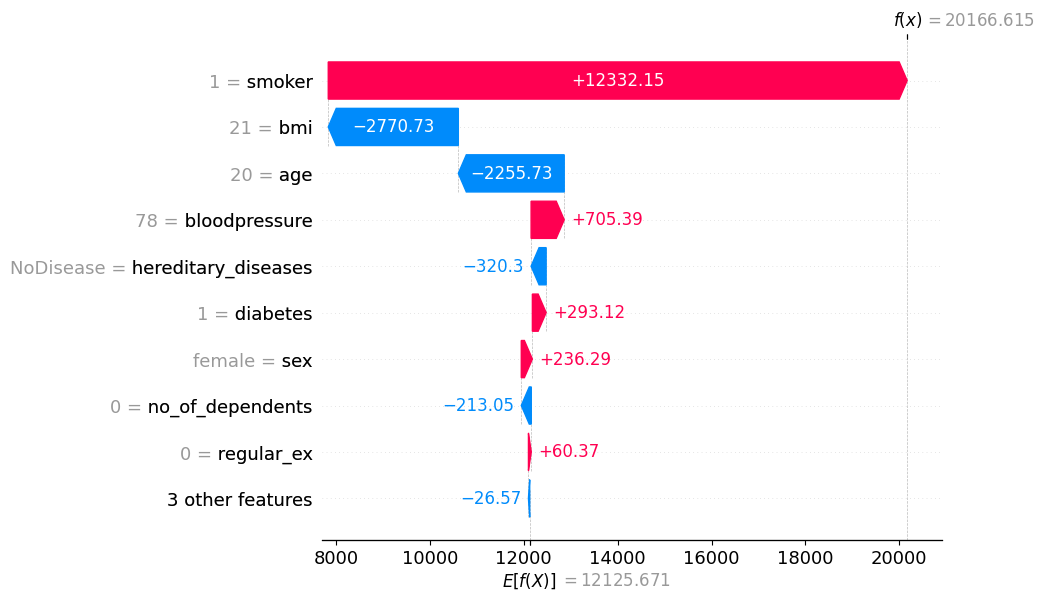

C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


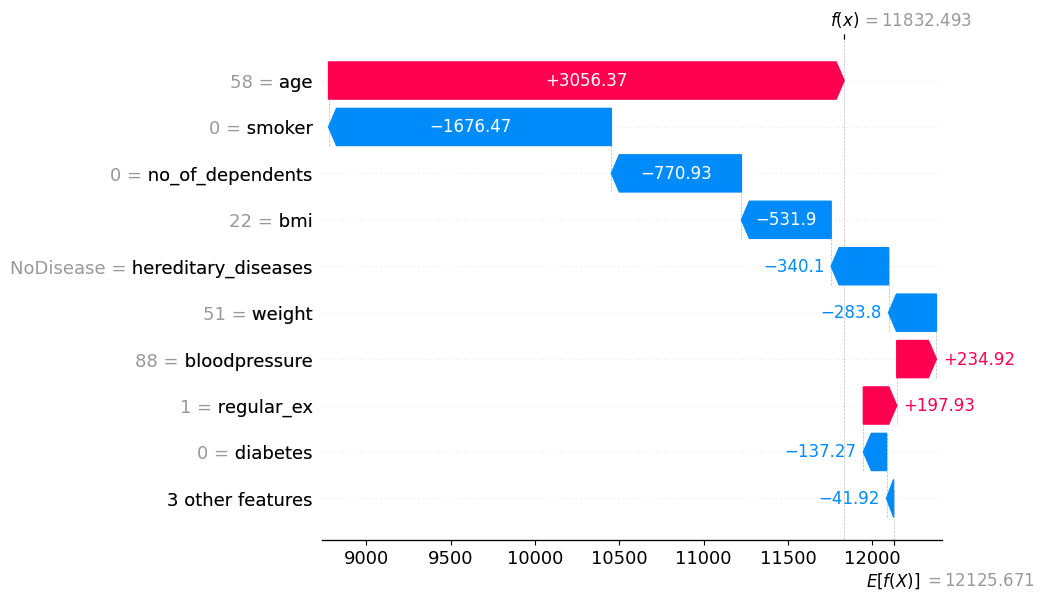

C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


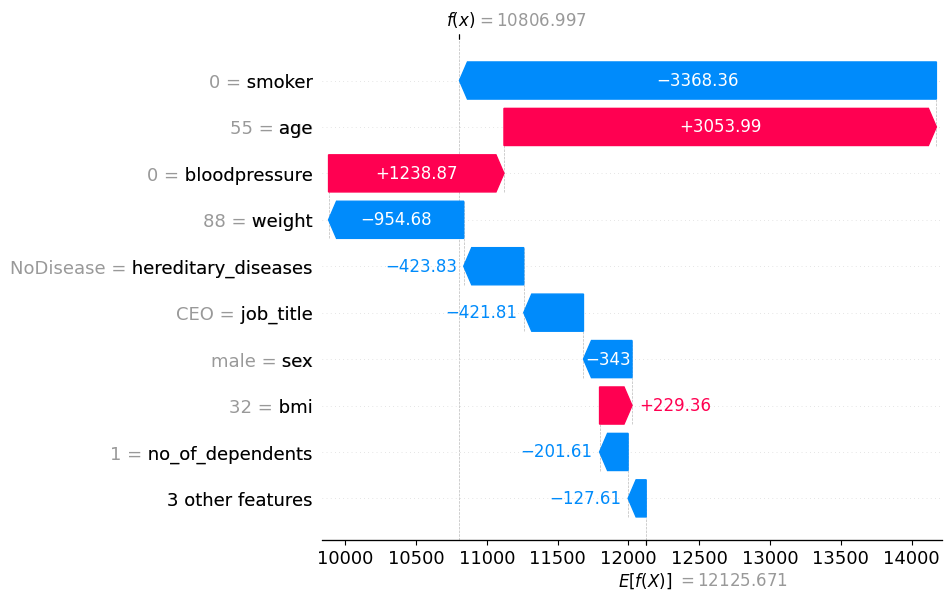

C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


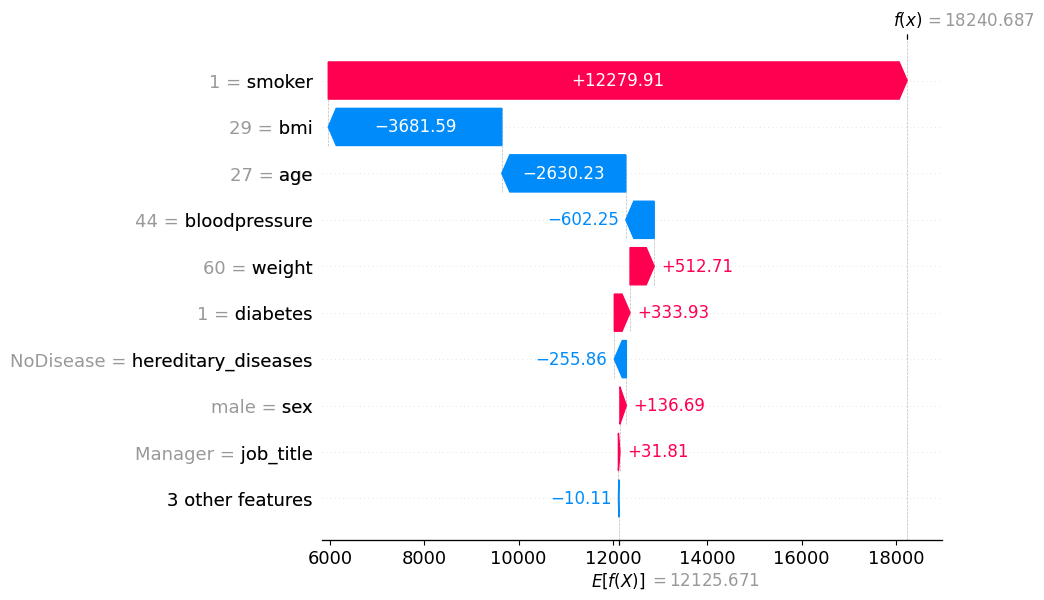

C:\Users\kobra\AppData\Local\Temp\ipykernel_12088\882371821.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NoDisease' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  row[feature] = map_encoded_to_labels(row[feature], encoder)


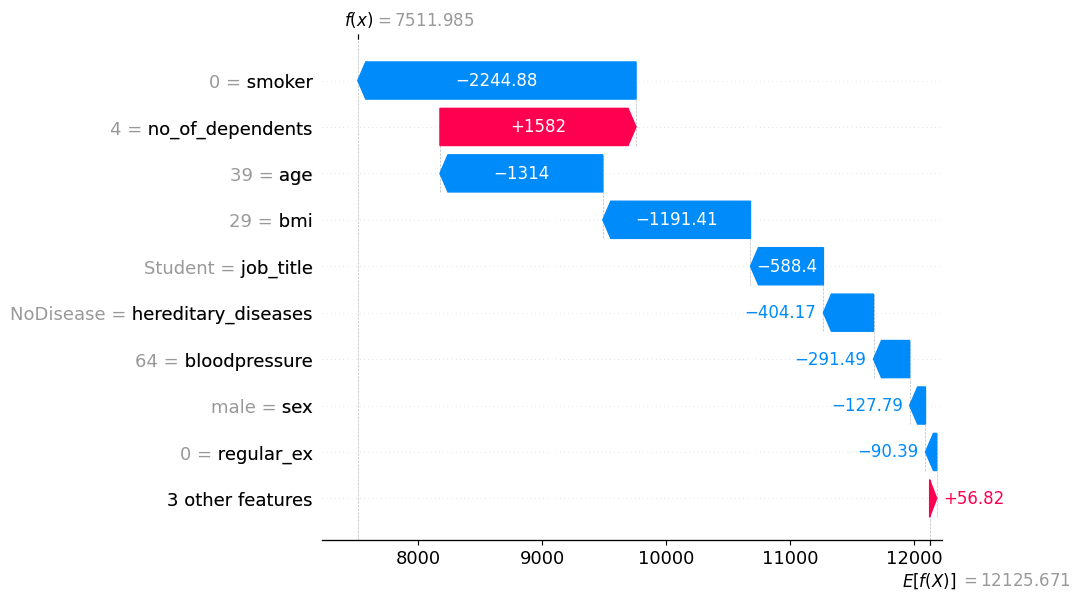

In [72]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# Assume 'X' is your DataFrame with encoded categorical features
# Assume 'model' is your trained model
# Assume 'encoder_dict' is a dictionary of your LabelEncoders for each categorical feature

# Define categorical and binary features
categorical_features = ['hereditary_diseases', 'city', 'job_title', 'sex']
binary_features = ['smoker', 'regular_ex', 'diabetes']

# Initialize SHAP explainer with the model and numeric data
explainer = shap.Explainer(model, X)

# Select 10 random rows from X
random_indices = np.random.choice(X.index, size=10, replace=False)
X_sample = X.loc[random_indices]

# Compute SHAP values
shap_values = explainer(X_sample)

# Function to map encoded values back to original labels
def map_encoded_to_labels(value, encoder):
    inverse_mapping = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
    return inverse_mapping.get(value, value)  # Direct lookup for single values

# Generate SHAP plots for each row ensuring correct feature names
for i in range(10):
    # Create a copy of the row to modify for display
    row = X_sample.iloc[i].copy()
    
    # Map encoded values back to original labels for categorical and binary features
    for feature in categorical_features + binary_features:
        if feature in row.index and feature in encoder_dict:
            encoder = encoder_dict[feature]
            row[feature] = map_encoded_to_labels(row[feature], encoder)

    # Create SHAP values object with original labels
    shap_values_display = shap.Explanation(
        values=shap_values.values[i],
        base_values=shap_values.base_values[i],
        data=row,
        feature_names=row.index
    )

    # Generate SHAP waterfall plot with correctly labeled features
    shap.waterfall_plot(shap_values_display)


# Diabetes seems off